# SVM para Regresión

En este caso haremos un problema de regresión con SVM. Crearemos nuestros datos aleatoriamente con una distribución no lineal, y emplearemos un solo rasgo para permitir una mejor visualización de los resultados.

In [7]:
import numpy as np
import matplotlib.pyplot as plt

El conjunto de predictoras lo crearemos de 200 muestras y 1 columa, con valores escaldos entre 1 y 5.

La variable a predecir la crearemos con la función `seno`, con los senos de 0 a 1 en un array.

In [3]:
X = np.sort(5*np.random.rand(200,1),axis=0)
X[:5,]

array([[0.01488689],
       [0.04260943],
       [0.05881068],
       [0.07109797],
       [0.13072475]])

In [6]:
Y = np.sin(X).ravel()
Y[:5,]

array([0.01488634, 0.04259654, 0.05877679, 0.07103809, 0.13035274])

Le añadiremos una componente de aleatoriedad a cada 5 números con la siguiente operación, generando un array aleatorio de 40 números (200/5).

In [8]:
Y[::5] += 3*(0.5 - np.random.rand(40))

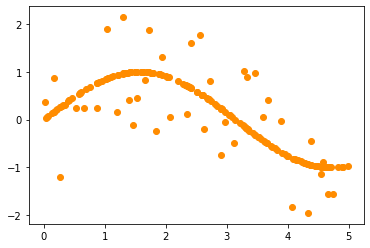

In [9]:
plt.scatter(X,Y, color='darkorange', label = 'data')

Para implementar la regresión con los SVM emplearemos la librería `SVR` de `sklearn`.

Estudiaremos el efecto que tiene sobre la regresión utilizar tres Kernels diferentes.

Opcional hacer ajuste de parámetros con GridSearch, tomar muestras y hacer validación cruzada.

In [10]:
from sklearn.svm import SVR

In [11]:
C=1e3
svr_lin = SVR(kernel='linear', C=C)
svr_rbf = SVR(kernel='rbf', C=C, gamma=0.1)
svr_pol = SVR(kernel='poly', C=C, degree=3)

In [12]:
y_lin = svr_lin.fit(X,Y).predict(X)
y_rbf = svr_rbf.fit(X,Y).predict(X)
y_pol = svr_pol.fit(X,Y).predict(X)

/Users/carlosdavila/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Ahora representamos las regresiones obtenidas con los distintos Kernels.

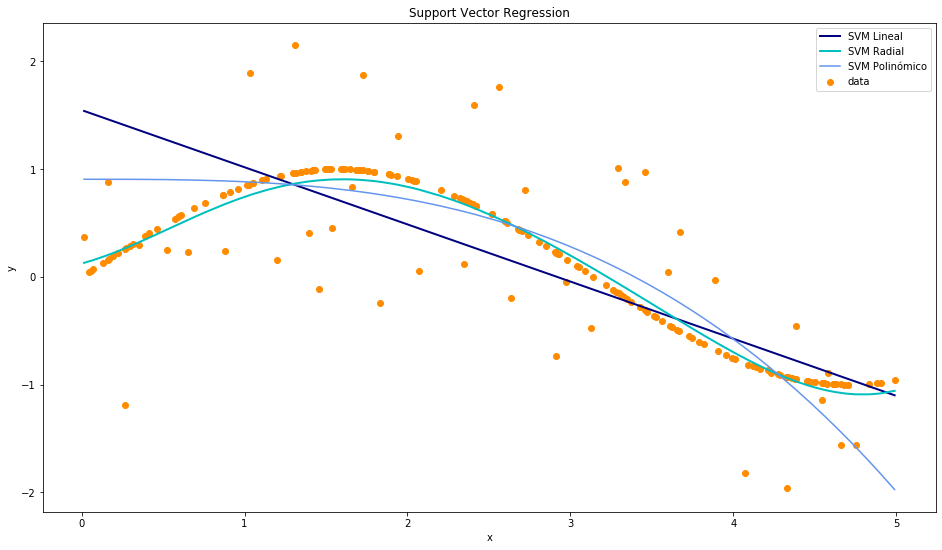

In [13]:
lw = 2 # linewidth
plt.figure(figsize=(16,9))
plt.scatter(X,Y, color='darkorange', label='data')
plt.plot(X, y_lin, color='navy', lw=lw, label='SVM Lineal')
plt.plot(X, y_rbf, color='c', lw=lw, label='SVM Radial')
plt.plot(X, y_pol, color='cornflowerblue', label='SVM Polinómico')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Support Vector Regression')
plt.legend()
plt.show()

Vemos que, con los valores que hemos establecido para los parámetros, el kernel que mejor ajusta el modelo es el radial.

Los hiperparámetros que aparecen en el caso del SVR:

* `C`: El término del error, para ajustar lo estrictos que queramos que sean los márgenes alrededor del hiperplano
* `epsilon`: especifica el corredor que tiene que rodear a la función donde no permitimos un error con puntos en la predicción a una distancia superior al épsilon de la función actual
* `gamma`: coeficiente de kernel para las funciones radiales
* `degrees`: grados del polinomio

Al ser un set tan sencillo, aunque juguemos con los parámetros, difícilmente vamos a conseguir que el modelo se ajuste mejor con otra configuración.

### Ventajas e inconvenientes de los modelos de SVM

Desde un punto de vista práctico, los SVM en general son muy útiles para datasets medios ya que la fase de entrenamiento es más lenta.

También sirve muy bien si los datos que se analizan tienen poco ruido.

Si el dataset tiene mucho ruido y tenemos clases con overlapping o zonas que se sobreponen unas con las otras, o con mucho ruido alrededor de la silueta original del dataset, los SVM van a cometer mucho error.

Cuando el número de rasgos es muy grande, las SVM se tienen que tener en cuenta, ya que son extremadamente útiles en estos casos, como en el ejemplo de la clasificación de imágenes, en el que teníamos más rasgos (píxeles) casi que imágenes.

Utilizar solo un conjunto de entrenamiento en la función de decisión (vectores) es bastante eficiente en memoria. Por tanto, solo con suministrar algunos de esos puntos si tenemos bastantes condiciones de homogeneidad, puede llevar a una rápida predicción en base a ellos. (Si tenemos los datos distribuidos de manera muy homogénea, con pocos datos se pueden obtener los soportes vectoriales de manera muy eficiente).

Las SVM no proporcionan estimaciones directas de la probabilidad, se implementan con sistemas de validación cruzada bastante costosos computacionalmente. Probablemente, en este sentido encontraremos otros modelos que nos de una justificación probabilística de la idoneidad del modelo.

Si bien es una técnica muy potente habrá que usarla con precaución ya que ajustar los hiperparámetros puede llegar a resultar muy costoso.